In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [ ]:
deadcols = ['KE', 'cosTh']

In [ ]:
dead_events = pd.read_csv('./energy-costh-deadevents-apr09/dead_events.txt', sep = " ",names = deadcols, header = None )

In [ ]:
cols_dead_thrs = ['KE', 'dESci1', 'dESci2', 'cosTh']

In [ ]:
dead_events_bcz_of_threshold = pd.read_csv('../apr/energy-costh-deadevents-apr09/dead_events_belowThreshold.txt',sep = " ", names = cols_dead_thrs, header = None)

In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(dead_events['cosTh'], bins = 20, element = 'step', color = 'blue', fill = False, log_scale=(False, True), label = 'dead events')

plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
plt.legend()
#plt.ylabel(fontsize = 14)
plt.grid(linestyle = '--')
#plt.ylim(0, 0.5e6)
plt.title(r'$<cos\theta>$ distribution for dead events ', fontsize = 16)
plt.savefig('../apr/cos_th_dead_events.png')


In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(dead_events['KE'], bins = 80, element = 'step', color = 'blue', fill = False, log_scale=(False, True), label = 'dead events')

plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
plt.legend()
#plt.ylabel(fontsize = 14)
plt.grid(linestyle = '--')
#plt.ylim(0, 0.5e6)
plt.title('Initial KE distribution for dead events ', fontsize = 16)

plt.savefig('../apr/ke_dead_events.png')



In [ ]:
dead_events_bcz_of_threshold.info()

In [ ]:
dead_events_bcz_of_threshold.describe()

In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(dead_events_bcz_of_threshold['KE'], bins = 80, element = 'step', color = 'blue', fill = False, log_scale=(False, True), label = 'dead events')

plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
plt.legend()
#plt.ylabel(fontsize = 14)
plt.grid(linestyle = '--')
#plt.ylim(0, 0.5e6)
plt.title('Initial KE distribution for dead events ', fontsize = 16)

plt.savefig('../apr/ke_dead_events_duetothr.png')



In [ ]:
#sns.histplot(dead_events_bcz_of_threshold['cosTh'],bins = 20 , log_scale = (False, True))
plt.figure(figsize = (10, 8))
sns.histplot(dead_events_bcz_of_threshold['cosTh'], bins = 20, element = 'step', color = 'blue', fill = False,label = 'dead events')# log_scale=(False, True), )

plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
plt.legend()
#plt.ylabel(fontsize = 14)
plt.grid(linestyle = '--')
plt.ylim(0, 20000)
plt.title(r'$<cos\theta>$ distribution for dead events due to detector threshold ', fontsize = 16)
plt.savefig('../apr/cos_th_dead_events_duetothr.png')


In [ ]:
sns.histplot(dead_events_bcz_of_threshold['cosTh'], bins = 20, element = 'step', color = 'blue', fill = False)#, log_scale=(False, True), label = 'dead events')


In [2]:
cols = ['eRconstTot', 'cosTh', 'E1']
type0 = pd.read_csv('../apr/energy-costh-deadevents-apr09/type0_energycosth.txt', sep = " ",header = None, names = cols,dtype=np.float16)#.drop(['E1'], axis = 1)

In [4]:
def beta (df): # beta = p_E / Ee = np.sqrt((KE)^2 + 2*m_e*KE) / (m_e + KE)
    m_e = 511; 
    
  df['beta'] = np.sqrt((df['eRconstTot']*df['eRconstTot']) + (2*m_e*df['eRconstTot'])) / (m_e + df['eRconstTot'])
     return df

In [7]:
def betaval (KE): # beta = p_E / Ee = np.sqrt((KE)^2 + 2*m_e*KE) / (m_e + KE)
    m_e = 511; 
    beta = np.sqrt((KE*KE) + (2*m_e*KE)) / (m_e + KE)
    return beta


In [11]:
m_e = 511
type0['beta'] = np.sqrt((type0['eRconstTot']*type0['eRconstTot']) + (2*m_e*type0['eRconstTot'])) / (m_e + type0['eRconstTot'])
  

In [3]:
m_e = 511
total_energy = type0['eRconstTot'] + m_e

# Calculate beta
type0['beta'] = np.sqrt(total_energy**2 - m_e**2) / total_energy

In [4]:
type0['betacosth'] = type0['beta']*type0['cosTh']

In [8]:
betaval(470)

0.8536195110974358

In [5]:
type0 = beta(type0)

In [9]:
type0['beta'].isna().sum()

0

In [5]:
type0

,eRconstTot,cosTh,E1,beta,betacosth
0,214.250,-0.451416,0.000,0.709620,-0.320334
1,223.500,-0.594727,0.000,0.718321,-0.427205
2,470.000,0.368164,470.000,0.853620,0.314272
3,221.000,-0.382568,0.000,0.716013,-0.273924
4,157.500,0.191162,157.500,0.644745,0.123251
...,...,...,...,...,...
78063068,513.000,0.237305,513.000,0.866588,0.205646
78063069,201.125,-0.131470,0.000,0.696486,-0.091567
78063070,175.375,-0.351318,0.000,0.667632,-0.234552
78063071,38.125,0.528320,38.125,0.366110,0.193424


In [ ]:
del type02

In [10]:
type01 = type0[type0['E1'] != 0].copy().drop('E1', axis = 1)


In [11]:
type02 = type0[type0['E1'] == 0.0].copy().drop('E1', axis = 1)


In [6]:
#calculating the mean of the binned value
def avgEvsCosth (df, col) :
    mean_stat = scipy.stats.binned_statistic(x = df['eRconstTot'], values = df[col], statistic='mean', bins = 160, range = (0,800))
    meanE1 = mean_stat.statistic
    tEdge = mean_stat.bin_edges[1:]
    return meanE1, tEdge
    

In [12]:
avgBetaCosth1, Erconst1 = avgEvsCosth(type01, 'betacosth')
avgBetaCosth2, Erconst2 = avgEvsCosth(type02, 'betacosth')

/home/rhythm/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)


In [7]:
avgBetaCosth, Erconst = avgEvsCosth(type0, 'betacosth')

/home/rhythm/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)


Text(0.5, 1.0, 'Energy deposited in det1 Type 0 ONLY $\\cos(\\theta)$ ')

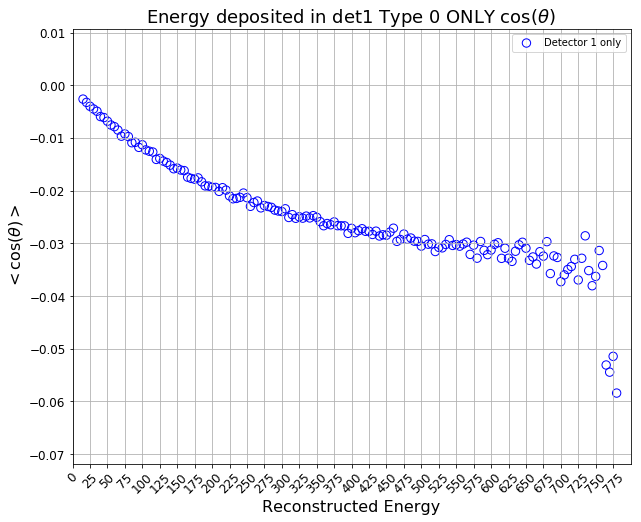

In [9]:

plt.figure(figsize = (10, 8))
plt.scatter(x = Erconst, y = avgBetaCosth,  s = 70, facecolors='none', edgecolors='blue', label = 'Detector 1 only')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in det1 Type 0 ONLY $\cos(\theta)$ ', fontsize = 18)
#plt.savefig('../apr/avg_cos_th_distribution_type0_det1.png')
  

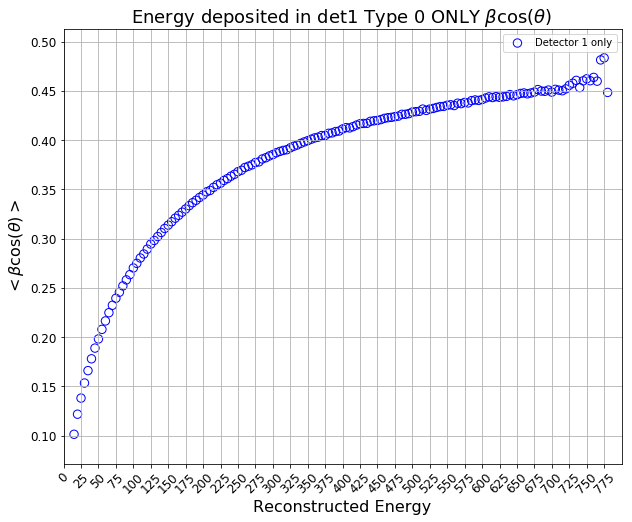

In [14]:

plt.figure(figsize = (10, 8))
plt.scatter(x = Erconst1, y = avgBetaCosth1,  s = 70, facecolors='none', edgecolors='blue', label = 'Detector 1 only')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\beta\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in det1 Type 0 ONLY $\beta\cos(\theta)$ ', fontsize = 18)
plt.savefig('../apr/avg_btacos_th_distribution_type0_det1.png')
  

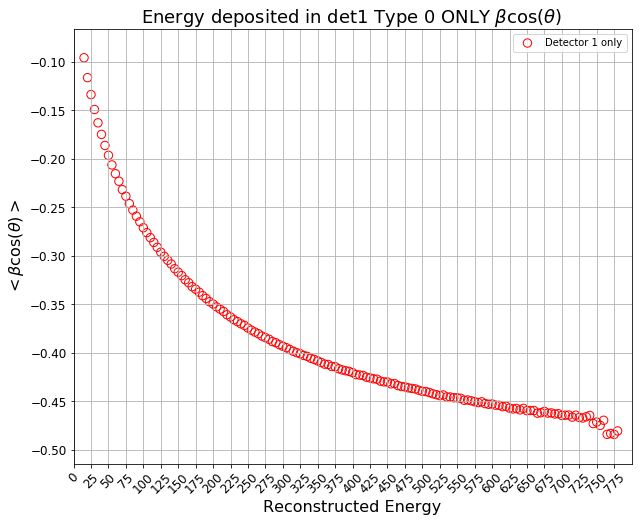

In [16]:

plt.figure(figsize = (10, 8))
plt.scatter(x = Erconst2, y = avgBetaCosth2,  s = 70, facecolors='none', edgecolors='red', label = 'Detector 1 only')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\beta\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in det1 Type 0 ONLY $\beta\cos(\theta)$ ', fontsize = 18)
plt.savefig('../apr/avg_btacos_th_distribution_type0_det2.png')
  

In [ ]:
avgCosTh, Etot = avgEvsCosth(type0)

In [ ]:
avgCosTh1 , E1 =avgEvsCosth(type01)
avgCosTh2 , E2 =avgEvsCosth(type02)

In [ ]:
del type0

In [ ]:

plt.figure(figsize = (10, 8))
plt.scatter(x = E1, y = avgCosTh1,  s = 70, facecolors='none', edgecolors='blue', label = 'Detector 1 only')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in det1 Type 0 ONLY $\cos(\theta)$ ', fontsize = 18)
plt.savefig('../apr/avg_cos_th_distribution_type0_det1.png')
  

for smaller energy dposited in the detector 1 only for type 0. the avg costheta increases as a function of 

In [ ]:

plt.figure(figsize = (10, 8))
plt.scatter(x = E2, y = avgCosTh2,  s = 70, facecolors='none', edgecolors='red', label = 'Detector 2 only')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
plt.ylim(-0.55,-0.4)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in det2 Type 0 ONLY $\cos(\theta)$ ', fontsize = 18)
plt.savefig('../apr/avg_cos_th_distribution_type0_det2.png')


In [ ]:

plt.figure(figsize = (10, 8))
plt.scatter(x = Etot, y = avgCosTh,  s = 70, facecolors='none', edgecolors='green', label = 'avgcosTh')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,20),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(-0.05,0.01)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Reconstructed for Type 0 ONLY $<\cos(\theta)>$ ', fontsize = 18)
plt.savefig('../apr/avg_cos_th_distribution_type0.png')
  
  

In [ ]:

plt.figure(figsize = (10, 8))
plt.scatter(x = E1, y = avgCosTh1,  s = 70, facecolors='none', edgecolors='g', label = 'avgcosTg 1')
plt.scatter(x = E2, y = avgCosTh2,  s = 70, facecolors='none', edgecolors='red', label = 'avgcosTg 2')
plt.scatter(x = Etot, y = avgCosTh,  s = 70, facecolors='none', edgecolors='blue', label = 'avgcosTh')

plt.xlim(0, 120)
plt.xticks(np.arange(0,120,10),fontsize =12)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(-0.05,0.01)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in Type 0 ONLY $\cos(\theta)$ ', fontsize = 18)
  

In [ ]:
type0['poscoth'] =np.abs (type0['cosTh'])

In [ ]:
type0

In [ ]:
costhp,avgE  = avgEvsCosth(type0, 'poscoth')

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(x = avgE, y = costhp,  s = 70, facecolors='none', edgecolors='g', label = 'avgcosTg 1')
#plt.scatter(x = E2, y = avgCosTh2,  s = 70, facecolors='none', edgecolors='red', label = 'avgcosTg 2')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<|\cos(\theta)|>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both', linestyle = '--')
plt.title(r'Reconstructed for Type 0 ONLY $<|\cos(\theta)|>$ ', fontsize = 18)
  
plt.savefig('../apr/abs_avg_cos_th_distribution_type0.png')

In [ ]:

# Convert cos(theta) to theta in degrees
type0['theta'] = np.degrees(np.arccos(type0['cosTh']))


In [ ]:
avg_theta,avg_E  = avgEvsCosth(type0, 'theta')

In [ ]:
avg_E

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(x = avgE, y = avg_theta,  s = 70, facecolors='none', edgecolors='g', label = 'avgcosTg 1')
#plt.scatter(x = E2, y = avgCosTh2,  s = 70, facecolors='none', edgecolors='red', label = 'avgcosTg 2')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\theta>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both', linestyle = '--')
plt.title(r'Reconstructed for Type 0 ONLY $<\theta>$ ', fontsize = 18)
  

In [ ]:
type0.head()

In [ ]:
type0 = type0.drop(['poscoth', 'theta'], axis = 1)
lowType0 = type0[type0['eRconstTot'] < 150].copy()

In [ ]:
lowType0

In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(lowType0['cosTh'], bins = 20, element = 'step', color = 'blue', fill = False)
plt.ylim(0,900000 )

In [ ]:
lowType01 = type01[type01['eRconstTot'] < 150].copy()
lowType02 = type02[type02['eRconstTot'] < 150].copy()

In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(lowType01['cosTh'], bins = 20, element = 'step', color = 'blue', fill = False, log_scale=(False, True), label = 'Detector 1')

sns.histplot(lowType02['cosTh'], bins = 20, element = 'step', color = 'red', fill = False, log_scale=(False, True), label = 'Detector 2')
plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
plt.legend()
#plt.ylabel(fontsize = 14)
plt.grid(linestyle = '--')
plt.ylim(0, 1e7)
plt.title(r'$<cos\theta>$ distribution for E < 150 keV', fontsize = 16)